[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17z7c8CUhk1v-IEFJ4VdKm_lnzyRBY7C2?usp=sharing)

<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC2010.500 (Intelligent Systems)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 13, 2020</center></h4>
<h4><center><font color="red">Submit: November 24, 2020</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Student's information</center></h4>
<h4>Names:<strong> Carlos Julian Herrera, Ali Villegas, Alfredo Quintero </strong></h4>   
 <h4>Students ID: <strong>A01114097, A01337596, A01337630 </strong> </h4>    
 <h4>Github:</h4>
 <ul>
  <li> <a href="https://github.com/JulianHerreraH/Sistemas_Inteligentes">Github Julian
  </a>
  </li>
  <li>
  <a href="https://github.com/AliVillegas/Sistemas-Inteligentes">Github Ali
  </a>
  </li>
  <li>
    <a href="https://github.com/alfredoqt/sistemas-inteligentes">Github Alfredo
    </a>
  </li>
 </ul>

<center>Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este proyecto esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este proyecto de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.</center>

## <font color="brown">Proyecto Final - Sistemas Inteligentes</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Martes 24 de noviembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
# Contenido

-----

1. [Objetivo](#scrollTo=g8Asi86GFMc2&line=10&uniqifier=1)

2. [Exploración de Datos](#scrollTo=AXe8FK-OFMc7&line=2&uniqifier=1)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#scrollTo=m6QhN4TkFMc_&line=5&uniqifier=1)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Conclusiones](#scrollTo=WkLmBzM1FMdE&line=5&uniqifier=1)

-----

<a id="objectives"></a>
# 1. Objetivo

---
[Regresar a contenido](#scrollTo=PDhQVakBFMc0&line=8&uniqifier=1)

Intentar presentar un enfoque completo para modelar problemas, que va desde el análisis exploratorio de datos hasta la aplicación de técnicas de aprendizaje supervisado y no supervisado a nuestros datos.

El contenido de esta notebook está dirigido principalmente para entender mejor las etapas que se realizan en los problemas de Ciencia de Datos y Aprendizaje Máquina (y posiblemente en Aprendizaje Profundo).  
**A continuación se presentara un breve introducción del proyecto**

## **Clasificación de razas de perros usando ML**  
El objetivo de esta notebook es presentar el proceso realizado para clasificar imagenes de perros. De manera general se siguieron los siguientes pasos para la implementación: 
- Importación de datasets
- Detección de rosotros humanos usando OpenCV
- Detección de perros usando una variedad de modelos preentrenados por PyTorch
- Creacion de modelo desde cero usando una **CNN y PyTorch**
  - Entrenamiento del modelo
- Creacion de modelo desde cero usando una **CNN y Keras/**
  - Entrenamiento del modelo
- Creación de CNN usando transfer learning  

En las secciones posteriores se explicará a detalle cada paso de la implemetación.

----  
Tras realizar el desarrollo, se lograron los siguientes resultados: 
- Para la CNN creada y entrenada desde cero, se obtuvo un 11% de precisón.
- Para la CNN con transfer learning se logró un 72% de precisión.  

La siguiente imagen muestra una clasificacion correcta de perro:  
![Dog](https://drive.google.com/uc?export=view&id=1JiqGW5U-qte4BBHn9gU8ZJAZgGN4fMJ2)

<a id="b"></a>
# 2. Exploración de Datos

---
[Regresar a contenido](#scrollTo=PDhQVakBFMc0&line=8&uniqifier=1)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

## **Selección de datasets**  
Para probar los modelos pre-entrenados y el entrenamiento de los creados desde cero, se utilizaron dos conjuntos de datos principales.  

El primero es de **perros**, indispensable para la clasificación de razas. Cuenta con **8,351** imagenes de **133** diferentes razas de perros.  
El conjunto de datos fue obtenido de esta dirección: 
> https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip  

De igual forma se uso un dataset con imagenes de humanos. Este cuenta con **13,253** archivos. Se obtuvo de la siguiente dirección:
> https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip  

Estos conjuntos de datos se eligieron ya que contienen bastantes archivos para entrenar y validar los modelos.  
Como un paso de validación adicional, se uso un clasificador de rostros humanos por OpenCV para evaluar una muestra del conjunto de datos:  
```
human_files_short = human_files[:100]
detect_face(human_files_short)
dog_files_short = dog_files[:200]
detect_face(dog_files_short)
```
Se obtuvieron los siguientes resultados usando el clasificador:  
- detect face in human_files: 100 / 100  
- detect face in dog_files: 124 / 200  

Para poder evaluar las razas correctamente se determino que sería necesario usar modelos.




## **Preprocesamiento de Datos**  
Antes de trabajar con los modelos fue necesario procesar las imagenes. Para lograr esto se llevaron acabo dos pasos principales:
- Seleccionar objetos de datos y atributos para análisis
- Crear y/o cambiar los atributos  

Como se menciono en la parte anterior, ya se llevo acabo la seleccion de datos para análisis. Después fue necesario cambiar los atributos de las imagenes.  

Se usaron las siguientes librerías para el pre-procesamiento:
- PIL para abrir los archivos.
- Transforms de torchvision para cambiar los atributos  

```
from PIL import Image
import torchvision.transforms as transforms
input_image = Image.open(img_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
```
El código presentado arriba es el encargado de abrir y procesar los archivos del dataset. Los más relevante de este procesamiento fue **ajustar el tamaño** de las imagenes a **256 pixeles**. Luego se aplico un **recorte centrado** a **224 pixeles**.  




<a id="c"></a>
# 3. Selección de modelos

---
[Regresar a contenido](#scrollTo=PDhQVakBFMc0&line=8&uniqifier=1)

En esta sección se trata de realizar una breve explicación de la metodología de aprendizaje automático. En caso de aplicar un **pipeline** de aprendizaje no supervisado y / o supervisado, que tenga un orden claro y expliquen el porqué de su aplicación con lo que han percibido de sus datos. 

El modelo seleccionado, qué parámetros o hiperparámetros eligieron, el porqué entrenaron con cierto tamaño de muestra y los resultados obtenidos.

## **Descripción General de los Modelos**  
Como se mencionó en la introducción, se usaron varios modelos y formas de entrenamiento para evaluar la mejor opción al clasificar razas de perros.  
Es importante resaltar que todos los modelos utilizados usan la metodología de **aprendizaje supervisado**.  
Para los modelos pre-entrenados se usaron modelos de PyTorch, fueron los siguientes: 
- VGG16
- ShuffleNet
- AlexNet
- GoogLeNet  

Se entrenaron dos CNN desde cero: 
- Usando PyTorch
- Usando TensorFlow  

Finalmente, se uso la técnica de Transfer Learning para entrenar otra CNN.

## **Modelos Preentrenados**   
#### Notebook se encuentra [aquí](https://colab.research.google.com/drive/1YEf9mC_JY8anU-SD3nW8_tua8Qx-t-cb?usp=sharing) 
Previamente se enlistaron los modelos pre-entrenados de PyTorch, a continuación se mostrara los detalles de implementación.  
Primero se importaron las librerías necesarias:

```
import torch
import torchvision.models as models
```

Los modelos se obtienen por medio de PyTorch, las especificaciones se pueden encontrar [aquí](https://pytorch.org/docs/stable/torchvision/models.html). De igual forma, se utilizo CUDA, si el sistema lo permite.   
Una vez importdas las librerias se descargaron los siguientes modelos: 
- VGG16
- ShuffleNet
- AlexNet
- GoogLeNet  

Estos modelos fueron entrenados con las imagenes del conjunto de datos ImageNet que contiene millones de imagenes clasificadas en diferentes clases.   
Después de descargar los modelos, se usaron de la siguiente manera: 


```
img = load_image(img_path)
if use_cuda:
    img = img.cuda()
ret = VGG16(img)
return torch.max(ret,1)[1].item() # predicted class index
```

En el código presentado muestra como se carga la imagen (pre-procesamiento) y luego se predice un resultado con el modelo, en este caso con VGG16.  
Despues de predecir la imagen se obtiene el indice de la clase de ImageNet.
Como ejemplo, usando VGG16, se obtiene el resultado correcto: 
> "German_shepherd_dog_04945.jpg" - ImageNet index is 235  
> Predicted index: 235  

Los otros modelos fueron implementados de igual forma.  
Para hacer una prueba rápida de cada modelo, se comparo la precisión de cada uno para determinar si una imagen era perro. 

```
Is it a dog?
VGG16: True
GoogLeNet: False
ShuffleNet: False
AlexNet: True
```  

Usando la misma imagen, solo VGG16 determino que era un perro.  Finalmente, se realizo una comparación con una muestra de 200 imagenes de perros. A continuación se muestra la grafica comparativa:  

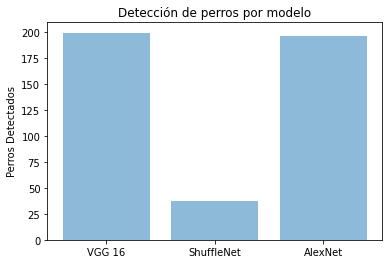

Como se peude observar, VGG16 tiene una precisión de 137/200. ShuffleNet encontro 37/200 y AlexaNet 196/200







## **CNN desde cero con PyTorch**  
#### Notebook se encuentra [aquí](https://colab.research.google.com/drive/1YEf9mC_JY8anU-SD3nW8_tua8Qx-t-cb?usp=sharing)   
Después de explorar los modelos pre-entrenados por PyTorch, se realizó una CNN entrenada desde cero. La red se creo usando PyTorch. A continuación se detallan los pasos tomados para implementar la CNN.  

Arquitectura de la CNN:

- Capa convolucional que toma 3 canales de entrada y saca 32 canales (m x n x 32). Tiene un kernel de tamaño 3 y un stride de 2, que hace que la imagen se reduzca a la mitad
- Capa convolucional que toma 32 canales (el output de la anterior) de entrada y saca 64 canales (m x n x 64). Tiene un kernel de tamaño 3 y un stride de 2, que hace que la imagen se reduzca a la mitad.
- Capa convolucional que toma 64 canales y los extiende a 128. Tiene un kernel de tamaño 3
- Se aplica un max pooling al final de cada convolución con un stride de 2 para tomar las características de max value de cada segmento y reducir la imagen a la mitad
- Se aplica ReLU como función de activación para apagar valores negativos al final de cada capa
- Se aplica flatten de la red y luego un dropout con probabilidad de 0.3 como regularización para prevenir overfitting
- Se aplican dos capas completamente conectadas con la activación de ReLU y un dropout con probabilidad de 0.3 para predecir las razas de perros

Breakdown de la arquitectura secuencial:
- Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
- ReLU
- MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
- Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
- ReLU
- MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
- Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
- ReLU
- MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
- Flatten: view(-1, 7*7*128)
- dropout(0.3)
- Linear(in_features=6272, out_features=512, bias=True)
- ReLU
- dropout(0.3)
- Linear(in_features=512, out_features=133, bias=True)

> **30 epochs dan un accuracy de 18% con una cross entropy loss function**

## **CNN desde cero con Keras**  
#### Notebook se encuentra [aquí](https://colab.research.google.com/drive/1OsFhHkcDuQKW6Xp4AjiZbl1qz55k_7eW?usp=sharing)   
Con el fin de explorar más a fondo el potencial de un modelo entrenado desde cero realizamos la implementación de otra CNN usando TensorFlow y Keras 

Como siguiente paso decidimos entrenar otra CNN esta vez utilizando la librería de keras en vez de Pytorch para comparar su accuracy. 

Usando el mismo dataset de perros preprocesamos la información, reescalando la información de las imágenes y entrenamos nuestra CNN

Utilizamos La arquitectura siguiente:

4 capas convulucionales

En la primera utilizamos 16 filtros y los fuimos duplicando hasta llegar a 512. 
Además utilizamos layers de pooling para reducir la complejidad y dropout para evitar overfitting del modelo. 

Al final obtuvimos el siguiente diseño: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 224, 224, 16)      432       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      48        
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        4608      
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 56, 56, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18432     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        192       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73728     
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 4, 128)         384       
_________________________________________________________________
activation_3 (Activation)    (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 133)               68229     
=================================================================
Total params: 1,215,237
Trainable params: 1,214,757
Non-trainable params: 480
_________________________________________________________________



Posteriormente hicimos pruebas con 10 15 50 y 300 epochs para comparar cuál era más efectivo. 

 > **Concluimos que 15 epochs arrojaban la mejor accuracy de 13.75% para nuestro modelo. Considerablemente menos accurate que una red preentrenada como se verá a continuación**



## **CNN usando Transfer Learning** 
#### Notebook se encuentra [aquí](https://colab.research.google.com/drive/1YEf9mC_JY8anU-SD3nW8_tua8Qx-t-cb?usp=sharing)   
Como último paso en el desarrollo del proyecto se creo un modelo a partir de ResNet50 pre-entrenado. Con la red creada desde cero como punto de partida, se uso transfer learning para tener un modelo más robusto.  
Primero se modificaron los parametros del modelo de ResNet: 


```
for param in model_transfer.parameters():
    param.requires_grad = False
model_transfer.fc = nn.Linear(2048, 133, bias=True)
fc_parameters = model_transfer.fc.parameters()
```  

Es importante recalcar que usar ResNet50 para la transferencia de conocimiento, ya que este modelo tiene un gran rendimiento para clasificar imagenes.  

El siguiente paso es especificar una función de perdida y optimización:  


```
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)
```  
Para entrenar el modelo, se necesitan los siguientes paramentros: 
- Número de epochs: en este caso 30
- Loaders
- Model: modelo a usar, ResNet50
- Criterion: usado para calcular la perdida
- Optimizer: la función de optimización anterior
- use_cuda: usar CUDA si esta disponible
- save_path: el path donde se guardará  

Después de entrenar el modelo, se probó con la funcion de ***test()*** usada para probar la CNN creada desde cero. Esto nos arrojo el siguiente resultado: 
> Test Accuracy: 77% (648/836)

Finalmente, se probó el modelo de nuevo con más imagenes. A continuación se muestran dos resultados. Uno en el que detecta a una persona y describe que raza podría ser y otro donde detecta un perro y describe la raza.  
Se probaron con varias imagenes, se muestra a continuacion la clasificación del perro de Julián y la raza de perro detectada con Ali.  
![Dog](https://drive.google.com/uc?export=view&id=1mTmfGdV8nybymuxZBZtEUWM4Zv8eEJ-Z)





<a id="d"></a>
# 4. Conclusiones

---
[Regresar a contenido](#scrollTo=PDhQVakBFMc0&line=8&uniqifier=1)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.

Logramos tanto entrenar redes CNN desde cero como utilizando transfer learning. 
Este proyecto sirvió excelentemente para aprender los conceptos básicos de redes convolucionales. 

Fue posible comparar las desventajas y ventajas tanto de utilizar redes completamente desde cero como redes preentrenadas, además aprendimos a utilizar tanto la librería de keras Tensorflow como Pytorch.   

Pudimos determinar que entrenar las redes desde cero requiere de varios factores y crear una red robusto no es tarea fácil. Por esto, consideramos que las redes pre-entrenadas son una herramienta muy util para poder empezar a trabajar rapidamente con ML.  

Respecto a los resultados obtenidos con las CNN entrenadas desde cero, determinamos que PyTorch obtuvo los mejores resultados. Con **18%** de accuracy. Sin embargo, fue bastante util realizar otra implementacion con Keras para comparar el proceso.  

Finalmente, nos dimos cuenta que usar transfer learning puede ser muy poderosos para reforzar las redes creadas desde cero con modelos ya existentes. Con esta metodologia obtuvimos un 77% de accuracy. 

Como trabajos y mejoras futuras, podemos buscar más tados para el entrenamientos y validación de las redes.

